# Projeto 1-Ciência dos dados-Paulo Chavarelli

# Pergunta

O IDH(indice de desenvolvimento humano) é um índice calculado por 3 fatores principais sendo eles:expectativa de vida,anos médios de estudos e renda per capita.Tendo em vista tal índice,é possivel que a densidade populacional e o índice de percepção da corrupção de um país interfira em seu IDH?





# Introdução

O índice de desenvolvimento humano foi utilizado pela primeira vez em 1990 pelo PNUD(Programa das Nações Unidas para o Desenvolvimento) pois era necessário um indicador que analisasse variáveis sociais,econômicas e acerca da saúde pública
e nao somente variaveis econômicas para apreciar o grau de desenvolvimentos de um país.
    O índice de Percepção de Corrupção(IPC) criado em 1966 é utlizado para tomadas de decisões,ou seja,avaliar os riscos e com isso orientar decisões.O IPC é um fator utilizadado para a manutenção da luta contra a corrupção e é um fator levado em conta entre países que realizam transações e acordos entre si, sendo que um IPC próximo de 1 demonstra que um país nao possui uma boa transparência internacional acerca da corrupção e um IPC perto de 0 indica que o país nao possui uma boa transparência
    A densidade populacional de um país é um índice que avalia a distribuição da população em um território,é importante visto que podemos analisar o quão junta ou espalhada uma população está em um país. 
    Tendo em vista tais indices e seus propósitos,achei interessante pesquisar e investigar se havia alguma relação proporcional entre os indices e se haveria países os quais saem da tendencia dos demais durante a análise exploratória.
    

In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Lendo dados dos arquivos

In [68]:
#Leitura dos arquivos
IDH = pd.read_excel('Hdi.xlsx')
Corrupcao = pd.read_excel('Corrupcao.xlsx')
Population= pd.read_excel('Population.xlsx')

In [69]:
#Manter para um unico ano
IDh_2008 = IDH.loc[:, ["HDI", 2008]]
Corrupcao_2008 = Corrupcao.loc[:, ["Corrupcao", 2008]]
Population_2008 = Population.loc[:, ["Pop", '2008']]

In [70]:
#Mudança de indice
IDH_idx = IDh_2008.set_index('HDI')
corrup_idx = Corrupcao_2008.set_index('Corrupcao')
Population_idx = Population_2008.set_index('Pop')




# Renomear colunas

In [71]:
#Renomear colunas
pt = IDH_idx.join(corrup_idx, how='inner', lsuffix='_IDH', rsuffix='_Corrupcao')
pt.head(173)

,2008_IDH,2008_Corrupcao
Afghanistan,0.370,1.3
Albania,0.733,3.2
Algeria,0.686,2.8
Angola,0.476,1.9
Argentina,0.786,2.9
Armenia,0.719,2.7
Australia,0.924,8.7
Austria,0.876,7.9
Azerbaijan,NaN,2.3
Bahrain,0.806,5.1


In [72]:
#Adicionando a terceira coluna

Junto = pt.join(Population_idx, how="inner",)

In [73]:
##Shape do frame
Junto.shape


(173, 3)

# Tudo em um único Dataframe

In [74]:
#Junto.loc[['Afghanistan','Albania','Argentina','Armenia','Belarus','Bolivia','Bosnia and Herzegovina','Brazil','Bulgaria','Cambodia','Cameroon','Central African Republic','Chile','Colombia','Costa Rica','Croatia','Ecuador','Egypt','Hungary','Iraq','Malaysia','Mexico','Montenegro','Paraguay','Peru','Qatar','Romania','Russia','Serbia','Sri Lanka','Tajikistan','Tanzania','Thailand','Timor-Leste','Turkey','Ukraine','United States','Uruguay','New Zealand']].sort_values('2008_IDH')
Junto.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
Junto.sort_values('2008_IDH').head(68)
Junto.columns=['2008_IDH','2008_IPC','2008_Densidade Populacional']
Junto



,2008_IDH,2008_IPC,2008_Densidade Populacional
Afghanistan,0.370,1.3,45.761
Albania,0.733,3.2,110.665
Algeria,0.686,2.8,14.455
Angola,0.476,1.9,14.469
Argentina,0.786,2.9,14.284
Armenia,0.719,2.7,103.325
Australia,0.924,8.7,2.779
Austria,0.876,7.9,99.475
Bahrain,0.806,5.1,1516.367
Bangladesh,0.484,2.4,1010.280


# Análise IDH

count    165.000000
mean       0.649594
std        0.179619
min        0.270000
25%        0.495000
50%        0.688000
75%        0.792000
max        0.941000
Name: 2008_IDH, dtype: float64


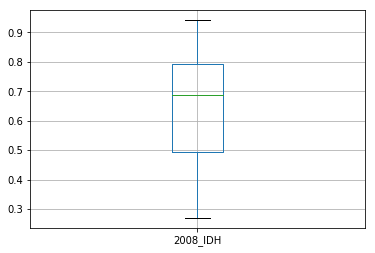

In [75]:
print(Junto['2008_IDH'].describe())
Junto.boxplot('2008_IDH')

Ao analisar o IDH pode se perceber que a média esta acima da metade do índice(0.5) porém existem muitos países abaixo da mediana(0.688) oque demonstra que existem muitos países abaixo da mediana portanto a simetria dos dados tende para a esquerda.

# Análise IPC

count    165.000000
mean       4.027879
std        2.120705
min        1.300000
25%        2.500000
50%        3.300000
75%        5.100000
max        9.400000
Name: 2008_IPC, dtype: float64


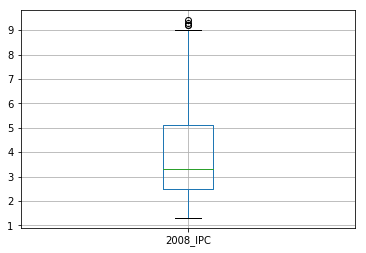

In [76]:
print(Junto['2008_IPC'].describe())
Junto.boxplot('2008_IPC')

Com a análise dos dados do IPC,pode se aferir que há mais países acima da mediana e muitos outliers,oque se entende pelos gráficos é que existem muitos países considerados corruptos sendo que metade deles posssui um IPC de 3.3 oque é considerado baixo pelo indice e tais paises nao sao considerados transparentes acerca da corrupção,podemos ver tambem que ha muitos outliers oque indica que há países considerados muito transparentes quando comparados com o espaço amostral analisado.






# Análise Densidade Populacional

count     165.000000
mean      207.767133
std       745.490378
min         1.703000
25%        29.759000
50%        70.084000
75%       130.018000
max      6987.139000
Name: 2008_Densidade Populacional, dtype: float64


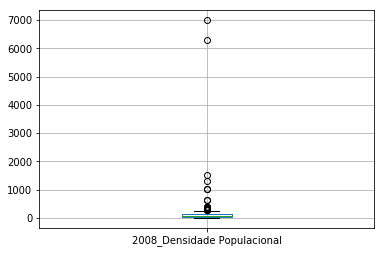

In [77]:
print(Junto['2008_Densidade Populacional'].describe())
Junto.boxplot('2008_Densidade Populacional')

A partir da analise da densidade populacional dos paises nao conseguimos tirar conclusoes concretas somente com tal indice visto que há um dispersão muito grande dos dados sendo que a simetria tende para a direita.

# Média,desvio padão,mínimo,quartis e máximo do Dataframe


In [78]:
Junto.describe()

,2008_IDH,2008_IPC,2008_Densidade Populacional
count,165.000000,165.000000,165.000000
mean,0.649594,4.027879,207.767133
std,0.179619,2.120705,745.490378
min,0.270000,1.300000,1.703000
25%,0.495000,2.500000,29.759000
50%,0.688000,3.300000,70.084000
75%,0.792000,5.100000,130.018000
max,0.941000,9.400000,6987.139000


# Correlevancia dos dados analisados

In [79]:
Junto.corr('pearson')

,2008_IDH,2008_IPC,2008_Densidade Populacional
2008_IDH,1.000000,0.740279,0.161697
2008_IPC,0.740279,1.000000,0.259717
2008_Densidade Populacional,0.161697,0.259717,1.000000


# Gráfico do IDH pelo IPC

<function matplotlib.pyplot.show>

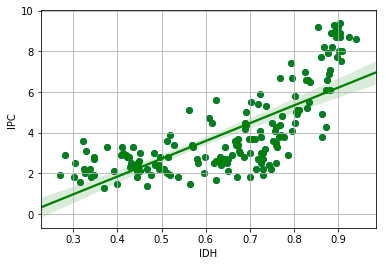

In [80]:
#Renomer coluna Corrupcao para indice de percepção da corrupção
plt.scatter(Junto['2008_IDH'],Junto['2008_IPC'])
sns.regplot(Junto["2008_IDH"],Junto["2008_IPC"], color=('green'))
plt.xlabel('IDH')
plt.ylabel('IPC')
plt.grid(True)
plt.show








Ao analisarmos a relaçao do IDH e o IPC podemos perceber que eles possuem uma correlevância de 0.74 oque indicam que eles tem uma relaçao boa,com o gráfico scatter plot podemos perceber que a tendencia é que países com maior IDH possuam maior IPC porém,tal tendencia nao é seguida por todos visto que há países com baixo idh e um IPC acima da média e vice versa.

# Gráfico do Idh pela Densidade populacional por km²


<function matplotlib.pyplot.show>

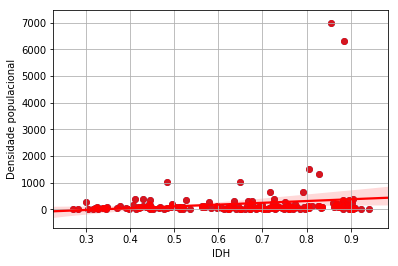

In [81]:
plt.scatter(Junto['2008_IDH'],Junto['2008_Densidade Populacional'])
sns.regplot(Junto["2008_IDH"],Junto["2008_Densidade Populacional"], color=('red'))
plt.xlabel('IDH')
plt.ylabel('Densidade populacional')
plt.grid(True)
plt.show

A partir da análise do IDH pela densidade populacional é compreendido que não há uma boa correlacao boa entre eles(correlação de 0.16) portanto não há uma tendencia seguida pelos países.

# Gráfico do IPC pela densidade populacional em km²

<function matplotlib.pyplot.show>

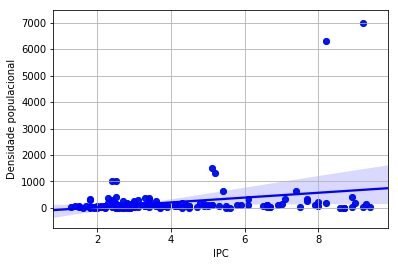

In [82]:
plt.scatter(Junto['2008_IPC'],Junto['2008_Densidade Populacional'])
sns.regplot(Junto["2008_IPC"],Junto["2008_Densidade Populacional"], color=('blue'))
plt.xlabel('IPC')
plt.ylabel('Densidade populacional')
plt.grid(True)
plt.show

O gráfico do IPC pela densidade populacional demonstra uma correlevancia baixa de 0.231 dando a mostrar que um indice nao interfere no outro sendo que a densidade populacional pode ser alta e o IPC baixo e vice versa,ou seja,não existe uma tendência entre os dados.

# Dataframe salvo em arquivo csv

In [83]:
#Salvar em arquivo csv
Junto.to_csv('Dataframe.csv', sep='\t', encoding='utf-8',index=True)

# Conclusão

Ao fim da análise podemos aferir que a densidade populacional de um país nao influência em seu IDH,tomando como exemplo Bangladesh que possui um IDH de 0.484 e uma densidade populacional de 1010.280 e em contraposição a Suiça que possui um dos maiores IDHs de 0.892 e uma baixa densidade populacional de 183.442 e devemos ressaltar que o IPC da Suiça é 9.4 enquanto o de Bangladesh é de 2.4.A partir de varias comparaçoes pode se compreender que há uma tendência de países do hemisferio norte e principalmente aqueles com densidade populacional menor tendem a ter um IDH mais alto porém,sempre há exceções como por exemplo Bahrain.È possível fazer uma desmistificaçao com o filosofo Nicolau Maquiavel que diz no seu livro "O principe" que países com populaçôes mais proximas prosperam enquanto países com populações muito espalhadas tendem a desordem e ao caos.






Em relação ao IPC nao podemos assegurar uma conclusão segura porém,a analise dos dados nos mostrou que a tendência é que países com maior transparência,ou seja, IPC mais próximo de 0,geralmente possuem maior IDH algo que já era esperado pois se o governo age de forma correta e em prol da sociedade como sempre deveria ser,o país tende a somente desenvolver.

Assim respondendo a pergunta:'Tendo em vista tal índice,é possivel que a densidade populacional e o índice de percepção da corrupção de um país interfira em seu IDH?'.Não se pode dizer que a densidade populacional e o IPC nao interfiram pois ambos interferem porém após a análise foi entendido que a densidade populacional influência muito pouco no IDH enquanto o IPC influência razoavelmente no IDH.Pode se argumentar que a corrupção tem uma influência maior pois o governo que direciona os investimentos para áreas de saúde,educação,etc e se houver corrupção os investimentos e desenvolvimentos serão mais demorados e não eficientes assim prejudicando o desenvolvimento humano.A densidade populacional por ser baseada na distribuição da populção no território nao consegue fornecer dados acerca de como essa distribuição afeta a saúde,economia e educação em diferentes áreas e por isso nao é influente para o IDH
